# eda002
baselineとground_truthの比較

In [37]:
import os
import pandas as pd
import ipynb_path
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)

In [2]:
def get_nb_name():
    nb_path = ipynb_path.get()
    nb_name = nb_path.rsplit('/',1)[1].replace('.ipynb','')
    return nb_name

In [3]:
# directory setting
nb_name = get_nb_name()
INPUT = '../input/google-smartphone-decimeter-challenge'
OUTPUT = '../output/' + nb_name
os.makedirs(OUTPUT, exist_ok=True)

In [4]:
# reading data
base_train = pd.read_csv(INPUT + '/' + 'baseline_locations_train.csv')
base_test = pd.read_csv(INPUT + '/' + 'baseline_locations_test.csv')
sample_sub = pd.read_csv(INPUT + '/' + 'sample_submission.csv')
ground_truth_train = pd.read_csv(INPUT + '/prep/ground_truth_train.csv')

In [5]:
train = ground_truth_train.copy()
train['latDeg_baseline'] = base_train['latDeg']
train['lngDeg_baseline'] = base_train['lngDeg']
train['height_baseline'] = base_train['heightAboveWgs84EllipsoidM']

In [7]:
train['latDeg_err'] = train['latDeg_baseline'] - train['latDeg']
train['lngDeg_err'] = train['lngDeg_baseline'] - train['lngDeg']
train['height_err'] = train['height_baseline'] - train['heightAboveWgs84EllipsoidM']

In [16]:
tmp = train[(train['collectionName']=='2020-05-14-US-MTV-1') & (train['phoneName']=='Pixel4')].copy()

In [24]:
tmp

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,timeSinceFirstFixSeconds,hDop,vDop,speedMps,courseDegree,latDeg_baseline,lngDeg_baseline,height_baseline,latDeg_err,lngDeg_err,height_err
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423576,-122.094132,33.21,551.44,1.1,0.0,0.0,12.7,37.423575,-122.094091,-34.06,-6.540000e-07,4.063500e-05,-67.27
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423576,-122.094132,33.21,552.44,1.1,0.0,0.0,12.7,37.423578,-122.094101,-33.29,1.745700e-06,3.103670e-05,-66.50
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423576,-122.094132,33.21,553.44,1.1,0.0,0.0,12.7,37.423573,-122.094111,-30.99,-2.664700e-06,2.113330e-05,-64.20
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423576,-122.094132,33.20,554.44,1.1,0.0,0.0,12.7,37.423583,-122.094121,-32.83,6.623900e-06,1.093170e-05,-66.03
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423576,-122.094132,33.20,555.44,1.1,0.0,0.0,12.7,37.423579,-122.094114,-34.49,3.314000e-06,1.823330e-05,-67.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,2020-05-14-US-MTV-1,Pixel4,1273531198442,37.645823,-122.405608,33.56,2286.44,0.8,0.0,0.0,161.7,37.645814,-122.405615,-33.66,-8.943300e-06,-6.915000e-06,-67.22
1736,2020-05-14-US-MTV-1,Pixel4,1273531199442,37.645823,-122.405608,33.56,2287.44,0.8,0.0,0.0,161.7,37.645819,-122.405615,-34.77,-4.143300e-06,-6.916700e-06,-68.33
1737,2020-05-14-US-MTV-1,Pixel4,1273531200442,37.645823,-122.405608,33.56,2288.44,0.8,0.0,0.0,161.7,37.645814,-122.405599,-35.89,-9.543300e-06,9.284300e-06,-69.45
1738,2020-05-14-US-MTV-1,Pixel4,1273531201442,37.645823,-122.405608,33.56,2289.44,0.8,0.0,0.0,161.7,37.645812,-122.405608,-35.07,-1.124330e-05,-1.669999e-08,-68.63


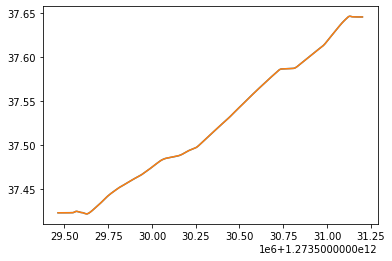

In [28]:
plt.plot(tmp['millisSinceGpsEpoch'], tmp['latDeg'])
plt.plot(tmp['millisSinceGpsEpoch'], tmp['latDeg_baseline'])

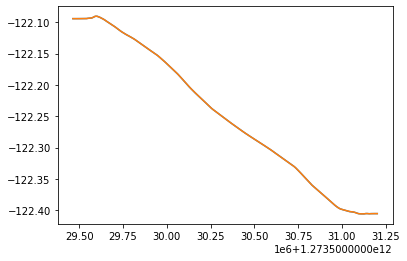

In [25]:
plt.plot(tmp['millisSinceGpsEpoch'], tmp['lngDeg'])
plt.plot(tmp['millisSinceGpsEpoch'], tmp['laDeg_baseline'])

<AxesSubplot:>

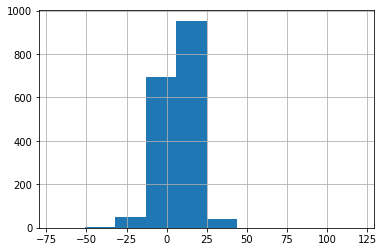

In [32]:
(tmp['latDeg_err']*1e6).hist()

<AxesSubplot:>

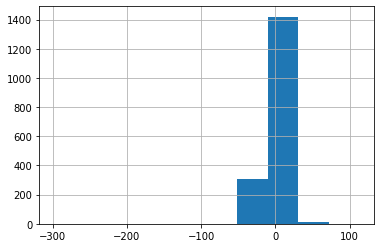

In [33]:
(tmp['lngDeg_err']*1e6).hist()

In [34]:
tmp = train[(train['collectionName']=='2020-05-14-US-MTV-1')].copy()

In [39]:
tmp.sort_values(['millisSinceGpsEpoch']).head(100)

,collectionName,phoneName,millisSinceGpsEpoch,latDeg,lngDeg,heightAboveWgs84EllipsoidM,timeSinceFirstFixSeconds,hDop,vDop,speedMps,courseDegree,latDeg_baseline,lngDeg_baseline,height_baseline,latDeg_err,lngDeg_err,height_err
0,2020-05-14-US-MTV-1,Pixel4,1273529463442,37.423576,-122.094132,33.21,551.44,1.1,0.0,0.0,12.70,37.423575,-122.094091,-34.06,-6.540000e-07,4.063500e-05,-67.27
1,2020-05-14-US-MTV-1,Pixel4,1273529464442,37.423576,-122.094132,33.21,552.44,1.1,0.0,0.0,12.70,37.423578,-122.094101,-33.29,1.745700e-06,3.103670e-05,-66.50
2,2020-05-14-US-MTV-1,Pixel4,1273529465442,37.423576,-122.094132,33.21,553.44,1.1,0.0,0.0,12.70,37.423573,-122.094111,-30.99,-2.664700e-06,2.113330e-05,-64.20
3,2020-05-14-US-MTV-1,Pixel4,1273529466442,37.423576,-122.094132,33.20,554.44,1.1,0.0,0.0,12.70,37.423583,-122.094121,-32.83,6.623900e-06,1.093170e-05,-66.03
1740,2020-05-14-US-MTV-1,Pixel4XLModded,1273529466449,37.423575,-122.094130,33.25,554.45,1.2,0.0,0.0,12.80,37.423574,-122.094137,-33.20,-1.688300e-06,-7.218300e-06,-66.45
4,2020-05-14-US-MTV-1,Pixel4,1273529467442,37.423576,-122.094132,33.20,555.44,1.1,0.0,0.0,12.70,37.423579,-122.094114,-34.49,3.314000e-06,1.823330e-05,-67.69
1741,2020-05-14-US-MTV-1,Pixel4XLModded,1273529467449,37.423575,-122.094130,33.24,555.45,1.2,0.0,0.0,12.80,37.423573,-122.094153,-33.92,-2.081700e-06,-2.300920e-05,-67.16
5,2020-05-14-US-MTV-1,Pixel4,1273529468442,37.423576,-122.094132,33.20,556.44,1.1,0.0,0.0,12.70,37.423578,-122.094126,-33.57,2.100500e-06,5.736700e-06,-66.77
1742,2020-05-14-US-MTV-1,Pixel4XLModded,1273529468449,37.423575,-122.094130,33.24,556.45,1.2,0.0,0.0,12.80,37.423578,-122.094148,-33.33,2.614200e-06,-1.809830e-05,-66.57
6,2020-05-14-US-MTV-1,Pixel4,1273529469442,37.423576,-122.094132,33.19,557.44,1.1,0.0,0.0,12.70,37.423572,-122.094114,-33.52,-3.616900e-06,1.813170e-05,-66.71
